### Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics.pairwise import pairwise_kernels

### Configurações gerais

In [2]:
# Paleta de cor
cmap = plt.cm.Set3

### Gerando dados aleatórios - Toy data

In [3]:
X, y = make_moons(n_samples=100, noise=0.08)

### Plotando as amostras como pontos em um gráfico bidimensional

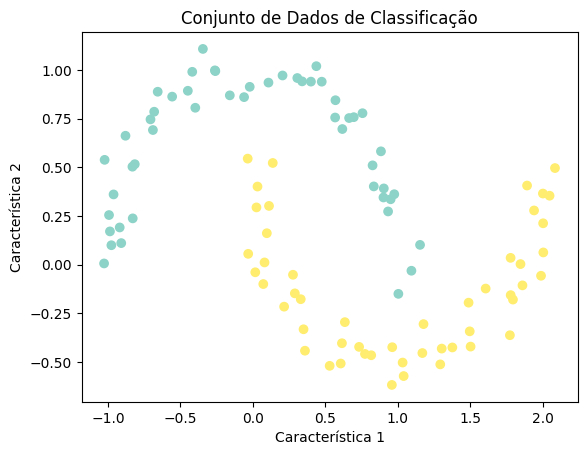

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Conjunto de Dados de Classificação')
plt.show()

### Pre-processamento

In [5]:
# Escalando os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Kernel pairwise kernel - NumPy

In [6]:
def event_probability_kernel(X, Y):
    """
    Compute the event probability kernel matrix given the input data X and Y.
    """
    K = pairwise_kernels(X, Y, metric=lambda x, y: np.sum(np.minimum(x, y)))
    
    return K

In [7]:
# Criando o modelo SVM com pairwise kernel
kernel = SVC(kernel=event_probability_kernel)

In [8]:
# Treinando o modelo
kernel.fit(X, y)

SVC(kernel=<function event_probability_kernel at 0x7fbc3cc31af0>)

### Visualizando fronteira de decisão

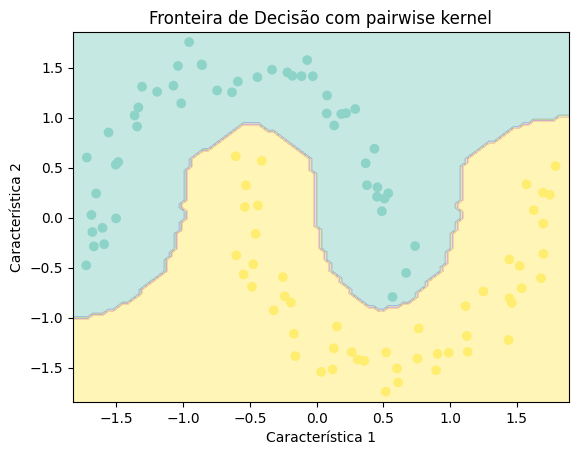

In [9]:
# Definir os limites do plot
xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

# Criar uma grade de pontos para plotar a fronteira de decisão
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = kernel.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotando a fronteira de decisão e os pontos de dados
plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title(f'Fronteira de Decisão com pairwise kernel')
plt.show()